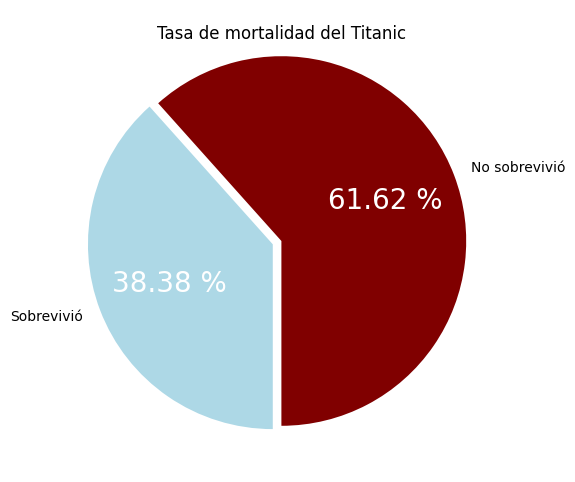

In [1]:
# Import librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Lee archivo
df_titanic = pd.read_csv("./data/titanic.csv")

# Slide 1
data = df_titanic["alive"].value_counts()

fig,axs = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
_, _, autopcts = axs.pie(data.values, labels= ["No sobrevivió","Sobrevivió"], autopct= '%.2f %%',\
                        startangle= 270, colors= ["maroon","lightblue"], explode=[0,0.05])
axs.set_title("Tasa de mortalidad del Titanic", y = 0.92)
plt.setp(autopcts, **{"color":"white", "fontsize":20});


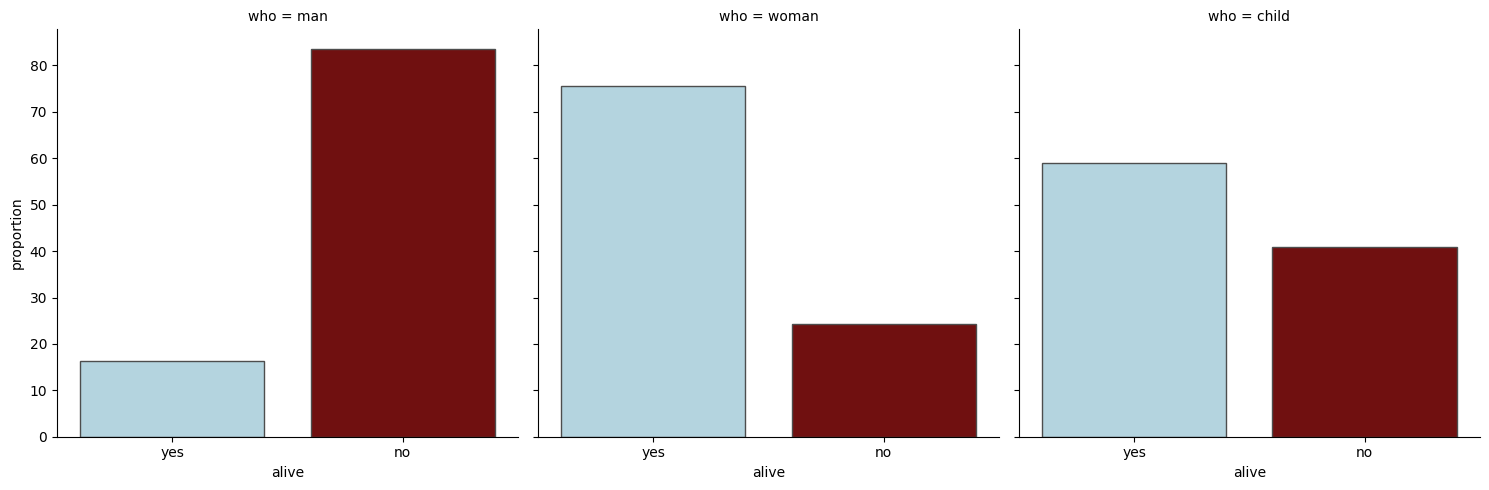

In [2]:
# Slide 2
frecuencias_relativas = df_titanic.groupby("who", as_index = False)["alive"].value_counts(normalize = True)
frecuencias_relativas["proportion"] *= 100

palette = {c: "maroon" if c == "no" else "lightblue" for c in df_titanic["alive"].unique()}

sns.catplot(x= "alive",y = "proportion",col= "who",order= ["yes","no"],col_order= ["man","woman","child"],\
            hue= "alive", palette= palette, kind= "bar",edgecolor= ".3",data= frecuencias_relativas);


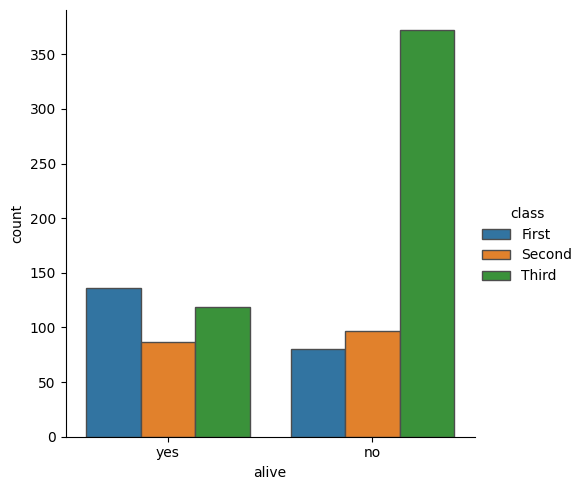

In [3]:
# Slide 3
sns.catplot(x= "alive",hue= "class",kind= "count",edgecolor= ".3",orient= "V",data= df_titanic.sort_values("class"));


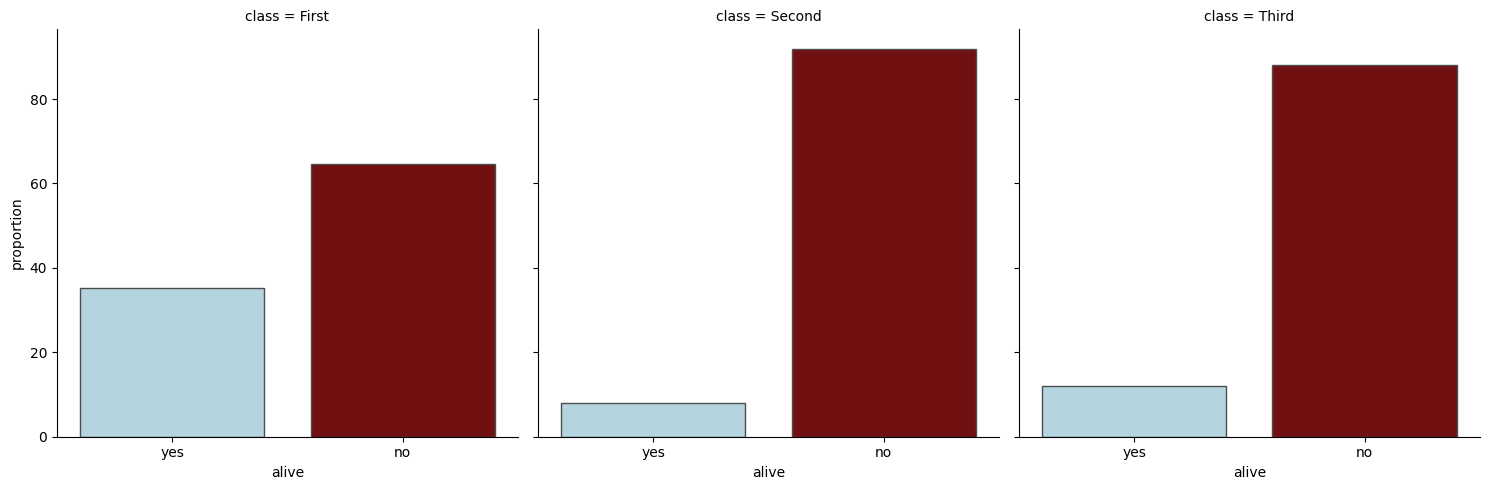

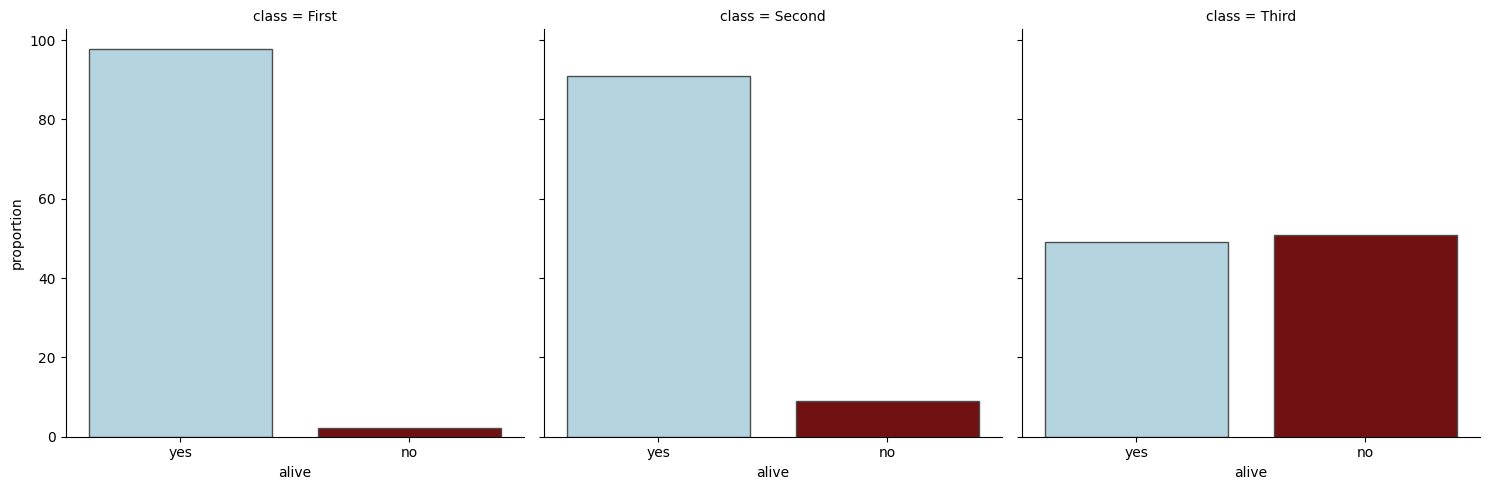

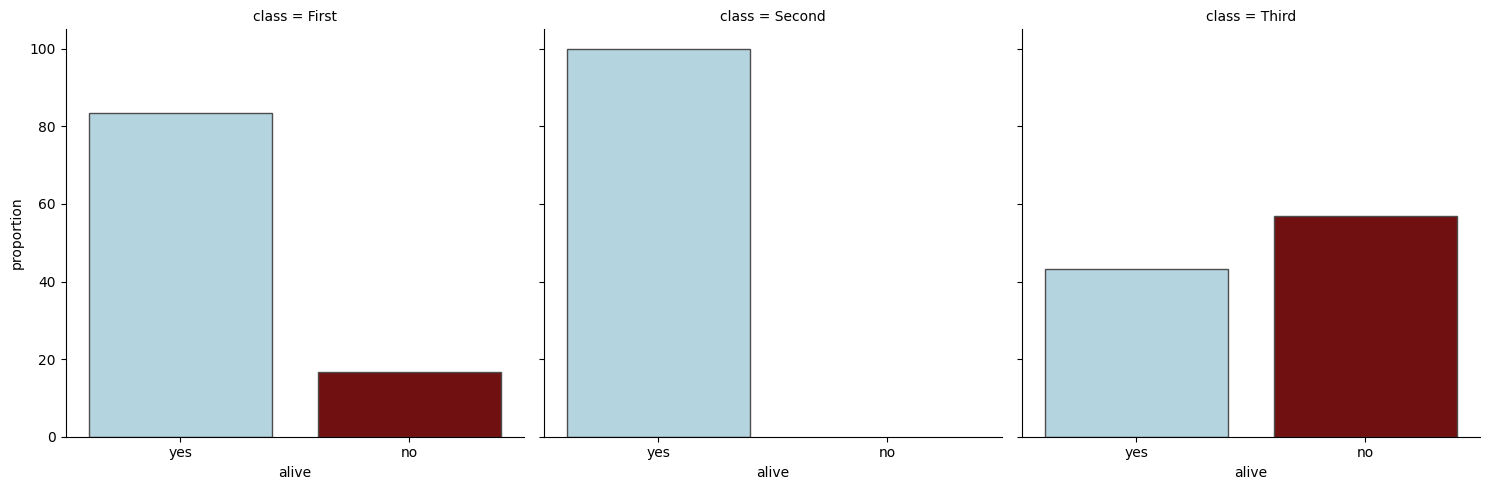

In [4]:
# Slide 4
df_titanic_m = df_titanic.loc[df_titanic["who"]=="man"]
frecuencias_relativas_m = df_titanic_m.groupby("class", as_index = False)["alive"].value_counts(normalize = True)
frecuencias_relativas_m["proportion"] *= 100

df_titanic_m = df_titanic.loc[df_titanic["who"]=="woman"]
frecuencias_relativas_w = df_titanic_m.groupby("class", as_index = False)["alive"].value_counts(normalize = True)
frecuencias_relativas_w["proportion"] *= 100

df_titanic_m = df_titanic.loc[df_titanic["who"]=="child"]
frecuencias_relativas_c = df_titanic_m.groupby("class", as_index = False)["alive"].value_counts(normalize = True)
frecuencias_relativas_c["proportion"] *= 100

palette = {c: "maroon" if c == "no" else "lightblue" for c in df_titanic["alive"].unique()}

sns.catplot(x= "alive",y= "proportion",col= "class",hue= "alive",palette= palette,order= ["yes","no"],col_order= ["First","Second","Third"],\
            kind= "bar",edgecolor= ".3",data= frecuencias_relativas_m)
sns.catplot(x= "alive",y= "proportion",col= "class",hue= "alive",palette= palette,order= ["yes","no"],col_order= ["First","Second","Third"],\
            kind= "bar",edgecolor= ".3",data= frecuencias_relativas_w)
sns.catplot(x= "alive",y= "proportion",col= "class",hue= "alive",palette= palette,order= ["yes","no"],col_order= ["First","Second","Third"],\
            kind= "bar",edgecolor= "0.3",data= frecuencias_relativas_c);


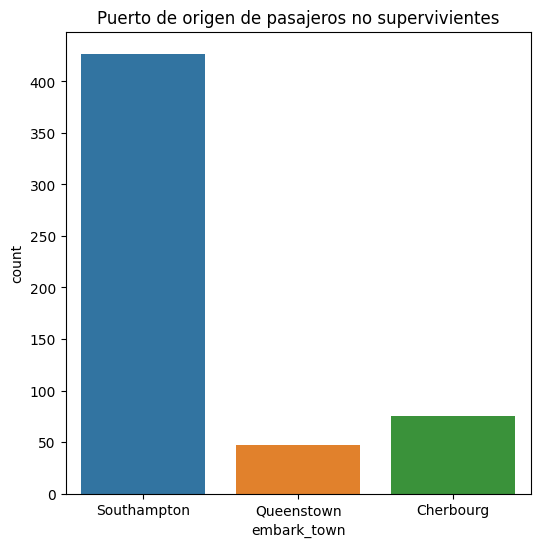

In [5]:
# Slide 5
df_titanic_na = df_titanic.loc[df_titanic["alive"] == "no"]
fig,ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.countplot(x = "embark_town", data = df_titanic_na, ax= ax, hue = "embark_town", legend = False);
ax.set_title("Puerto de origen de pasajeros no supervivientes");


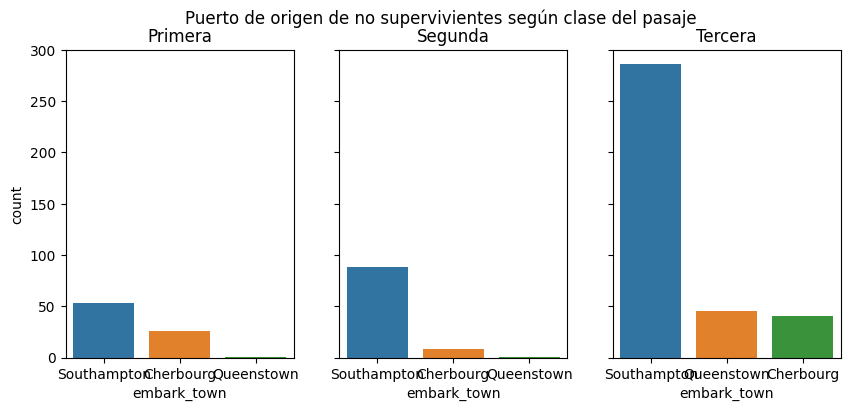

In [6]:
# Slide 6
df_titanic_nap = df_titanic.loc[(df_titanic["alive"] == "no") & (df_titanic["class"] == "First")]
df_titanic_nas = df_titanic.loc[(df_titanic["alive"] == "no") & (df_titanic["class"] == "Second")]
df_titanic_nat = df_titanic.loc[(df_titanic["alive"] == "no") & (df_titanic["class"] == "Third")]

fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,4), sharey= True)
fig.suptitle("Puerto de origen de no supervivientes según clase del pasaje")
sns.countplot(x = "embark_town", data = df_titanic_nap, ax= axs[0], hue = "embark_town", legend = False)
axs[0].set_title("Primera")
sns.countplot(x = "embark_town", data = df_titanic_nas, ax= axs[1], hue = "embark_town", legend = False)
axs[1].set_title("Segunda")
sns.countplot(x = "embark_town", data = df_titanic_nat, ax= axs[2], hue = "embark_town", legend = False)
axs[2].set_title("Tercera");
